# Fourier Transform

Fourier transform has found its importance as one of the most widely used tools in theoretical and computational physics. It allows us to break down functions or signals into their component parts and analyze, smooth, or even filter them at its most simplistic case.

A perodic function $f(x)$ defined on a finite interval $0 \leq x < L$ can be written as a Fourier series, i.e.

$$ f(x) = \sum_{k=0}^{\infty} \alpha_k \cos\left(\frac{2\pi kx}{L}\right) + \sum_{k=0}^{\infty} \beta_k \sin\left(\frac{2\pi kx}{L}\right) = \sum_{k=-\infty}^{\infty} \gamma_k \exp\left(i\frac{2\pi kx}{L}\right) $$

where

$$ \gamma_k = \frac{1}{L}\int\limits_0^L f(x)\exp\left(i\frac{2\pi kx}{L}\right) dx = 
    \begin{cases}
        \frac{1}{2}(\alpha_{-k}+i\beta_{-k}), & k<0 \\
        \alpha_0, & k=0 \\
        \frac{1}{2}(\alpha_{k}-i\beta_{k}), & k>0
    \end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft 

## Discrete Fourier Transform

### One-dimensional DFT
$$ \gamma_k = \frac{1}{N} \sum_{n=0}^{N-1} y_n \exp\left(i\frac{2\pi kx}{L}\right) $$

For $N$ real samples $y_n$ for all $k$ in the range $0 \leq k \leq \frac{N}{2}$:

In [2]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2 + 1, complex)
    for i in range(N//2 + 1):
        for n in range(N):
            c[i] += y[n]*np.exp(-2j*np.pi*i*n/N)
    return c

### Two-dimensional DFT

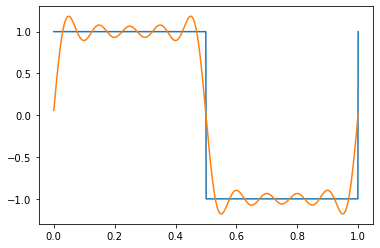

In [3]:
x = np.linspace(0, 1, 1000)
y = np.array([1 if np.floor(2*t) % 2 == 0 else -1 for t in x])
plt.plot(x, y)

y_fft = rfft(y)
y_fft[10:] = 0
filtered_wave = irfft(y_fft)
plt.plot(x, filtered_wave)
plt.savefig("basic 2d rfft.png", dpi = 1000)

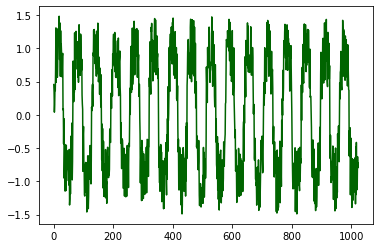

In [4]:
pitch_data = np.loadtxt("Raw Data\pitch.txt", float)
x_range = np.array([points for points in range(len(pitch_data))])

plt.plot(x_range, pitch_data, color = "darkgreen")
plt.savefig("pitch noise.png", dpi = 1000)

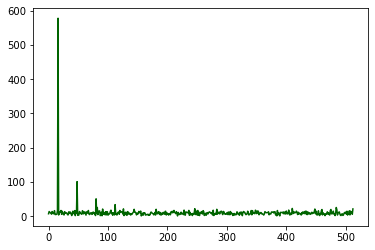

In [5]:
c = dft(pitch_data)
plt.plot(x_range[0:len(c)], abs(c), color = "darkgreen")
plt.savefig("pitch noise dft.png", dpi = 1000)

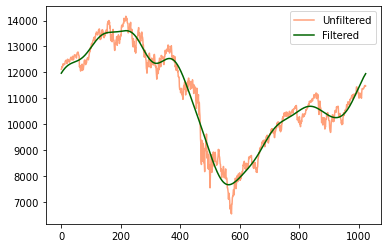

In [6]:
dow_data = np.loadtxt("Raw Data\dow.txt", float)
dow_rfft = rfft(dow_data)
dow_rfft[dow_data.shape[0] // 100:] = 0
filtered_dow = irfft(dow_rfft)

plt.plot(dow_data, label = "Unfiltered", color = "lightsalmon")
plt.plot(filtered_dow, label = "Filtered", color = "darkgreen")
plt.legend()
plt.savefig("dow dft.png", dpi = 1000)

## Fast Fourier Transform

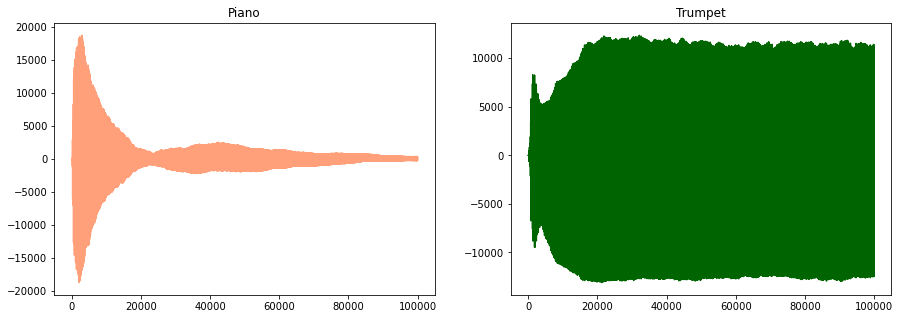

In [7]:
piano_data = np.loadtxt(r"Raw Data\piano.txt", float)
trumpet_data = np.loadtxt(r"Raw Data\trumpet.txt", float)
# putting r makes the file path a raw string; errors encountered without it

x_values = np.array([values for values in range(len(piano_data))])

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(x_values, piano_data, color = "lightsalmon")
ax[0].set_title("Piano")
ax[1].plot(x_values, trumpet_data, color = "darkgreen")
ax[1].set_title("Trumpet")

# fig.tight_layout()
plt.savefig("raw instrument data.png", dpi = 1000)

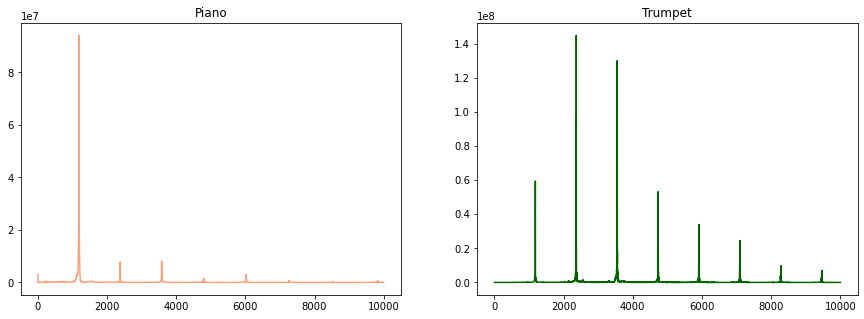

In [8]:
piano_fft, trumpet_fft = rfft(piano_data), rfft(trumpet_data)
data = 10000
rfft_xvals = np.linspace(0, data)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(abs(piano_fft[:data]), color = "lightsalmon")
ax[0].set_title("Piano")
ax[1].plot(abs(trumpet_fft[:data]), color = "darkgreen")
ax[1].set_title("Trumpet")

plt.savefig("filtered instrument data.png", dpi = 1000)

### Application: Image Deconvolution

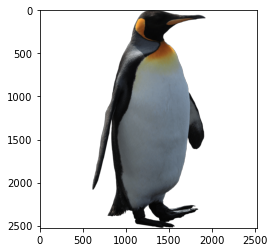

In [9]:
img = plt.imread("penguin.png")
img_green = img[:, 100:-100, 1] # Green Channel (l:w:RGB)
N, M = img_green.shape

plt.imshow(img)

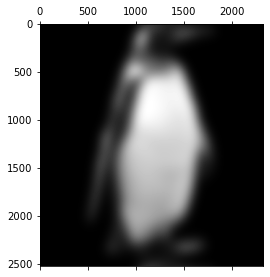

In [10]:
x_vals = np.linspace(-1,1,M)
y_vals = np.linspace(-1,1,N)
X, Y = np.meshgrid(x_vals, y_vals)

img_green_fft = np.fft.fft2(img_green)
img_green_fft = np.fft.fftshift(img_green_fft)

sigma = 0.05
gauss_2d = np.exp(-(X**2 + Y**2)/(2*sigma*sigma))

gauss_2d_fft = np.fft.fft2(gauss_2d)
gauss_2d_fft = np.fft.fftshift(gauss_2d_fft)

blurred_image = np.fft.fftshift(np.abs(np.fft.ifft2(img_green_fft*gauss_2d_fft)))
plt.matshow(blurred_image, cmap = "gray")
plt.savefig("blurred penguin.png", dpi = 1000)